In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir())



train_dir = 'cell_images'   # replace the id with id of file you want to access
test_dir = 'cell_images/cell_images'
print(train_dir)


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 128,128
    print("LOADING DATA FROM : ",end = "")
    i=0
    for folder in os.listdir(train_dir):
        #folder="Parasitized"
        print(folder, end = ' | ')
        i=0
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            if (temp_img is not None):
              temp_img = cv2.resize(temp_img, size)

              
              temp_imgx = cv2.cvtColor(temp_img,cv2.COLOR_BGR2GRAY)

              
              
              th3 = cv2.adaptiveThreshold(temp_imgx,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,13)
          
              print("FUCK U ABN , J.K ,",i)
              i += 1
            else:
              pass
              
            
            images.append(th3)
            labels.append(folder)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = load_data()

MODEL CREATED
Train on 74482 samples, validate on 8276 samples
Epoch 1/20
74482/74482 [==============================] - 26s 343us/step - loss: 0.8575 - acc: 0.8181 - val_loss: 0.2761 - val_acc: 0.9630
Epoch 2/20
74482/74482 [==============================] - 24s 319us/step - loss: 0.1995 - acc: 0.9753 - val_loss: 0.1414 - val_acc: 0.9849
Epoch 3/20
74482/74482 [==============================] - 24s 321us/step - loss: 0.1681 - acc: 0.9796 - val_loss: 0.1274 - val_acc: 0.9866
Epoch 4/20
74482/74482 [==============================] - 24s 318us/step - loss: 0.1425 - acc: 0.9852 - val_loss: 0.1603 - val_acc: 0.9865
Epoch 5/20
74482/74482 [==============================] - 24s 317us/step - loss: 0.1079 - acc: 0.9916 - val_loss: 0.0858 - val_acc: 0.9932
Epoch 6/20
74482/74482 [==============================] - 24s 317us/step - loss: 0.1470 - acc: 0.9874 - val_loss: 0.0619 - val_acc: 0.9973
Epoch 7/20
74482/74482 [==============================] - 24s 317us/step - loss: 0.1169 - acc: 0.9893 -

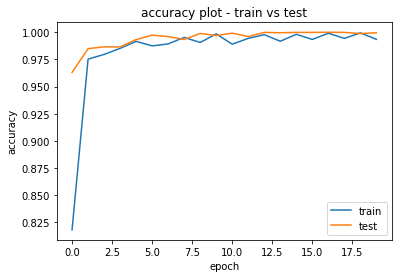

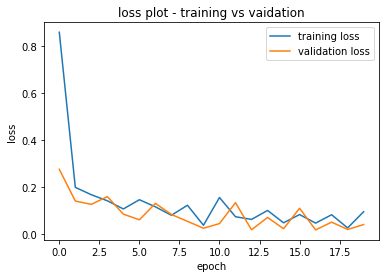

4356/4356 [==============================] - 1s 122us/step

Evaluation Accuracy =  99.91% 
Evaluation loss =  0.043627


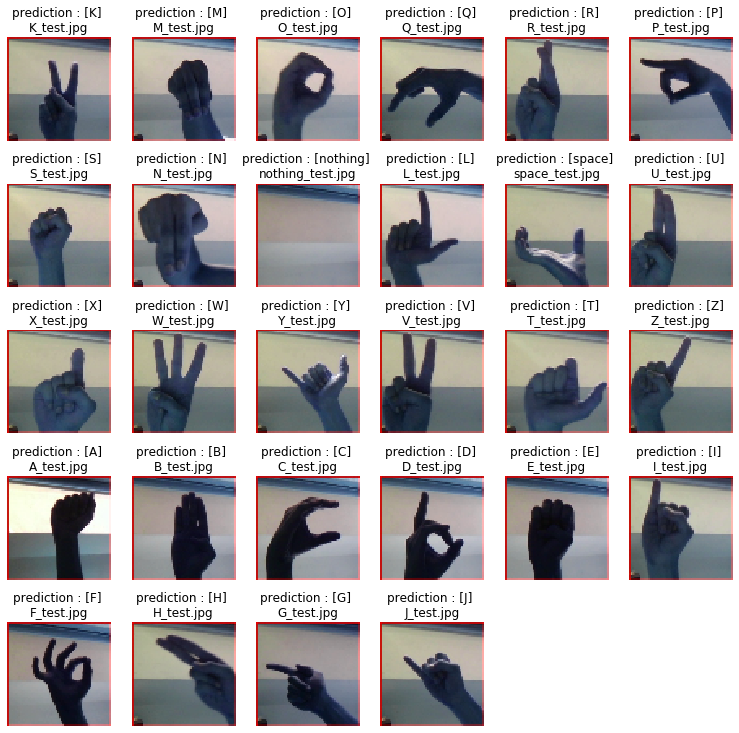

In [ ]:
def create_model():
    
    model = Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))

    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 20, validation_split = 0.1)
    return model_hist

model = create_model()
curr_model_hist = fit_model()
model.summary()
plt.plot(curr_model_hist.history['acc'])
plt.plot(curr_model_hist.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

# make predictions on an image and append it to the list (predictions).
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_images]

def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()